## **<center>Supervised Machine Learning</center>**
## <center>Introduction to Classification</center>



<div>
<center><img src="https://upload.wikimedia.org/wikipedia/commons/f/fd/RMS_Titanic_3.jpg" width="500"/>
</div></center>

# <center> Jack! Where are you?? </center>

## **WORKING ENVIRONMENT SET UP**

In [1]:
#Data manipulation
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from patsy import dmatrices

#Plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# ML Libraries
from sklearn import datasets, svm
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess


## LOAD DATA

In [2]:
df = pd.read_csv("data/train.csv") 

In [3]:
df.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### DATA DICTIONARY


|Variable |	Definition | Key |
|:--------|:----------:|----:|
|survival |	Survival   |	0 = No, 1 = Yes |
|pclass   |	Ticket class| 	1 = 1st, 2 = 2nd, 3 = 3rd |
|sex      |	Sex         | male, female	|
|Age      |	Age in years |	|
|sibsp    |	# of siblings / spouses aboard the Titanic | 	|
|parch    |	# of parents / children aboard the Titanic |	|
|ticket   |	Ticket number	|  |
|fare	  | Passenger fare	|  |
|cabin	  | Cabin number	|  |
|embarked |	Port of Embarkation |	C = Cherbourg, Q = Queenstown, S = Southampton |


In [4]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [5]:
df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Percentage of null values for Age 

177/891

0.19865319865319866

In [7]:
df = df.drop(['Ticket','Cabin'], axis=1)


In [8]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch     Fare Embarked  
0        0   7.2500        S  
1        0  71.2833        C  
2        0   7.9250        S  
3        0  53.1000        S  
4        0   8.0500        S  
..     ...      ...      ...  
886      0  13.0000        S  
887      0  30.0000        S  
888      2  23.4500        S  
889      0  30.0000        C  
890      0   7.7500        Q  

[891 rows x 10 columns]

In [9]:
df['Embarked'].value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

## **DESCRIPTIVE ANALYSIS**

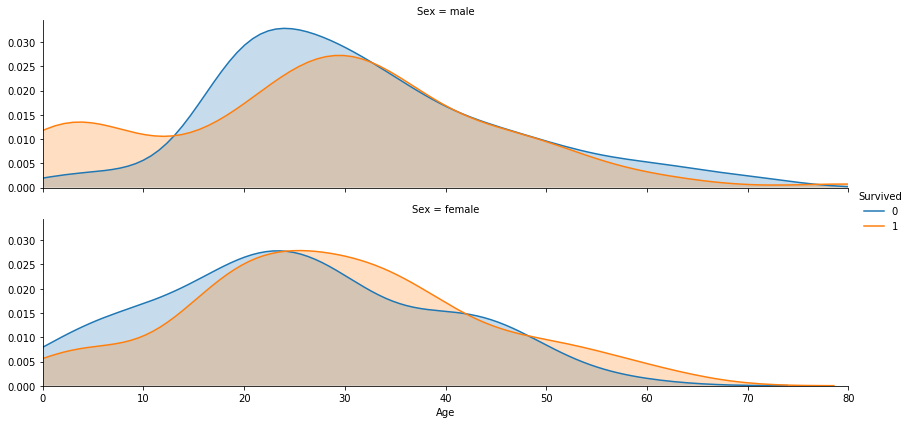

In [10]:
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

plot_distribution( df , var = 'Age' , target = 'Survived' , row = 'Sex' )

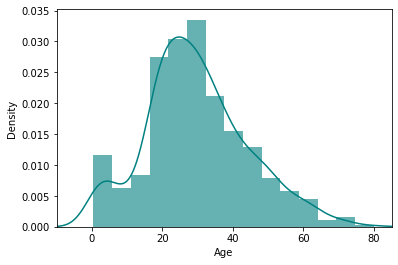

In [11]:
ax = df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [12]:
df["Age"].mean(skipna = True)

29.69911764705882

In [13]:
df["Age"].median(skipna = True)

28.0

In [14]:
# Definir los parámetros de las gráficas
fig   = plt.figure(figsize = (18,6), dpi = 1600)
alpha = alpha_scatterplot = 0.2
alpha_bar_chart = 0.55

ax1 = plt.subplot2grid((2,3),(0,0))
# gráfico de barras con la proporción de personas que sobrevivieron y los que no
df.Survived.value_counts().plot(kind = 'bar', alpha = alpha_bar_chart)
ax1.set_xlim(-1,2)
plt.title("Distribution of Survival, (1 = Survived)")

ax2 = plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived, df.Age, alpha = alpha_scatterplot)
plt.ylabel("Age")
plt.grid(b = True, which = 'major', axis = 'y')
plt.title("Survival by Age, (1 = Survived)")

ax3 = plt.subplot2grid((2,3),(1,0), colspan = 2)
df.Pclass.value_counts().plot(kind = "barh", alpha = alpha_bar_chart)
ax3.set_ylim(-1, len(df.Pclass.value_counts()))
plt.title("Class Distribution")

ax4 = plt.subplot2grid((2,3),(1,0), colspan = 2) 
df.Age[df.Pclass == 1].plot(kind = 'kde')
df.Age[df.Pclass == 2].plot(kind = 'kde')
df.Age[df.Pclass == 3].plot(kind = 'kde')
plt.xlabel("Age")
plt.title("Age Distribution within classes")
plt.legend(('1st Class','2nd Class','3rd Class'), loc = 'best')

ax5 = plt.subplot2grid((2,3),(1,2))
df.Embarked.value_counts().plot(kind = 'bar', alpha = alpha_bar_chart)
ax5.set_xlim(-1, len(df.Embarked.value_counts()))
plt.title("Passengers per boarding location")

Text(0.5, 1.0, 'Passengers per boarding location')

Text(0.5, 1.0, 'Survival Breackdown (1= Survived, 0 = Died)')

<Figure size 432x288 with 0 Axes>

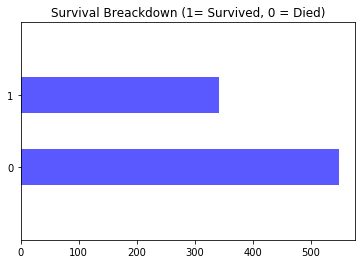

In [15]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
df.Survived.value_counts().plot(kind = 'barh', color = 'blue', alpha = .65)
ax.set_ylim(-1, len(df.Survived.value_counts()))
plt.title("Survival Breackdown (1= Survived, 0 = Died)")



In [16]:
fig = plt.figure(figsize=(18,4), dpi=1600)
alpha_level = 0.65


ax1=fig.add_subplot(141)
female_highclass = df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male, highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

In [17]:
fig = plt.figure(figsize=(18,12), dpi=1600)
a = 0.65
# Step 1
ax1 = fig.add_subplot(341)
df.Survived.value_counts().plot(kind='bar', color="blue", alpha=a)
ax1.set_xlim(-1, len(df.Survived.value_counts()))
plt.title("Step. 1")

# Step 2
ax2 = fig.add_subplot(345)
df.Survived[df.Sex == 'male'].value_counts().plot(kind='bar',label='Male')
df.Survived[df.Sex == 'female'].value_counts().plot(kind='bar', color='#FA2379',label='Female')
ax2.set_xlim(-1, 2)
plt.title("Step. 2 \nWho Survived? with respect to Gender."); plt.legend(loc='best')

ax3 = fig.add_subplot(346)
(df.Survived[df.Sex == 'male'].value_counts()/float(df.Sex[df.Sex == 'male'].size)).plot(kind='bar',label='Male')
(df.Survived[df.Sex == 'female'].value_counts()/float(df.Sex[df.Sex == 'female'].size)).plot(kind='bar', color='#FA2379',label='Female')
ax3.set_xlim(-1,2)
plt.title("Who Survied proportionally?"); plt.legend(loc='best')


# Step 3
ax4 = fig.add_subplot(349)
female_highclass = df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female highclass', color='#FA2479', alpha=a)
ax4.set_xticklabels(["Survived", "Died"], rotation=0)
ax4.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax5 = fig.add_subplot(3,4,10, sharey=ax1)
female_lowclass = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=a)
ax5.set_xticklabels(["Died","Survived"], rotation=0)
ax5.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax6 = fig.add_subplot(3,4,11, sharey=ax1)
male_lowclass = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=a)
ax6.set_xticklabels(["Died","Survived"], rotation=0)
ax6.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax7 = fig.add_subplot(3,4,12, sharey=ax1)
male_highclass = df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male highclass', alpha=a, color='steelblue')
ax7.set_xticklabels(["Died","Survived"], rotation=0)
ax7.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

# Feature Engineering

In [18]:
train_data = df.copy()

In [19]:
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare Embarked  
0      0   7.2500        S  
1      0  71.2833        C  
2      0   7.9250        S  
3      0  53.1000        S  
4      0   8.0500        S

### Age: Median Imputation (new variable: Age_Median)

In [20]:
train_data['Age_median'] = train_data['Age']

In [21]:
train_data["Age_median"].fillna(train_data["Age_median"].median(skipna=True), inplace=True)

In [22]:
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare Embarked  Age_median  
0      0   7.2500        S        22.0  
1      0  71.2833        C        38.0  
2      0   7.9250        S        26.0  
3      0  53.1000        S        35.0  
4      0   8.0500        S        35.0

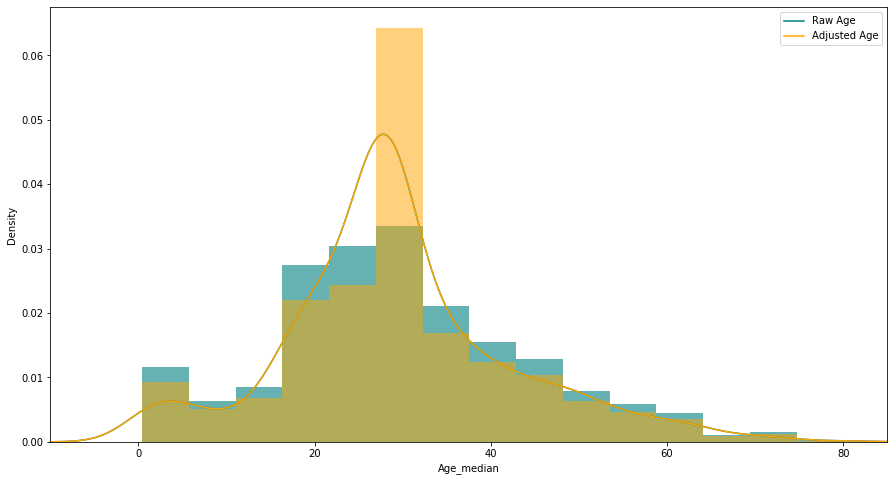

In [32]:
plt.figure(figsize=(15,8))
ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_data["Age_median"].plot(kind='density', color='teal')
ax = train_data["Age_median"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
train_data["Age_median"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age_median')
plt.xlim(-10,85)
plt.show()

### Age: End of Tail Imputation (new variable: Age_end_value)

In [25]:
age_end_value = train_data.Age.mean() + 3 * train_data.Age.std()
age_end_value


73.27860964406095

In [26]:
train_data['Age_End'] = train_data['Age']

In [27]:
train_data.Age_End.fillna(age_end_value, inplace=True)

In [28]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
Age_median       0
Age_End          0
dtype: int64

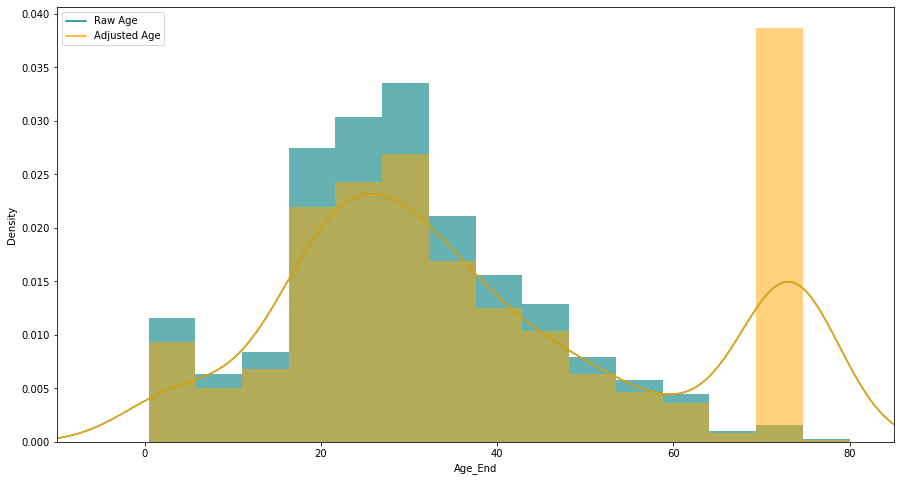

In [31]:
plt.figure(figsize=(15,8))
ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_data["Age_End"].plot(kind='density', color='teal')
ax = train_data["Age_End"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
train_data["Age_End"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age_End')
plt.xlim(-10,85)
plt.show()

### Embarked: Frequency Category Imputation

In [33]:
train_data["Embarked"].fillna(train_data['Embarked'].value_counts().idxmax(), inplace=True)

In [34]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
Age_median       0
Age_End          0
dtype: int64

In [35]:
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare Embarked  Age_median  Age_End  
0      0   7.2500        S        22.0     22.0  
1      0  71.2833        C        38.0     38.0  
2      0   7.9250        S        26.0     26.0  
3      0  53.1000        S        35.0     35.0  
4      0   8.0500        S        35.0     35.0

### NEW VARIABLE: TravelAlone

In [36]:
train_data['TravelAlone'] = np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)

In [37]:
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare Embarked  Age_median  Age_End  TravelAlone  
0      0   7.2500        S        22.0     22.0            0  
1      0  71.2833        C        38.0     38.0            0  
2      0   7.9250        S        26.0     26.0            1  
3      0  53.1000        S        35.0     35.0            0  
4      0   8.0500        S        35.0     35.0            1

In [38]:
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

### One Hot Encoding: Pclass, Embarked, Sex

In [39]:
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])

In [40]:
training.head()

PassengerId  Survived                                               Name  \
0            1         0                            Braund, Mr. Owen Harris   
1            2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3         1                             Heikkinen, Miss. Laina   
3            4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5         0                           Allen, Mr. William Henry   

    Age     Fare  Age_median  Age_End  TravelAlone  Pclass_1  Pclass_2  \
0  22.0   7.2500        22.0     22.0            0         0         0   
1  38.0  71.2833        38.0     38.0            0         1         0   
2  26.0   7.9250        26.0     26.0            1         0         0   
3  35.0  53.1000        35.0     35.0            0         1         0   
4  35.0   8.0500        35.0     35.0            1         0         0   

   Pclass_3  Embarked_C  Embarked_Q  Embarked_S  Sex_female  Sex_male  
0         1           0           0           1           0         1  
1         0           1           0           0           1         0  
2         1           0           0           1           1         0  
3         0           0           0           1           1         0  
4         1           0           0           1           0         1

In [41]:
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)

final_train = training
final_train.head()

Survived   Age     Fare  Age_median  Age_End  TravelAlone  Pclass_1  \
0         0  22.0   7.2500        22.0     22.0            0         0   
1         1  38.0  71.2833        38.0     38.0            0         1   
2         1  26.0   7.9250        26.0     26.0            1         0   
3         1  35.0  53.1000        35.0     35.0            0         1   
4         0  35.0   8.0500        35.0     35.0            1         0   

   Pclass_2  Pclass_3  Embarked_C  Embarked_Q  Embarked_S  Sex_male  
0         0         1           0           0           1         1  
1         0         0           1           0           0         0  
2         0         1           0           0           1         0  
3         0         0           0           0           1         0  
4         0         1           0           0           1         1

### NEW VARIABLE: IsMinor

In [42]:
final_train['IsMinor']=np.where(final_train['Age']<=16, 1, 0)

In [43]:
final_train.head()

Survived   Age     Fare  Age_median  Age_End  TravelAlone  Pclass_1  \
0         0  22.0   7.2500        22.0     22.0            0         0   
1         1  38.0  71.2833        38.0     38.0            0         1   
2         1  26.0   7.9250        26.0     26.0            1         0   
3         1  35.0  53.1000        35.0     35.0            0         1   
4         0  35.0   8.0500        35.0     35.0            1         0   

   Pclass_2  Pclass_3  Embarked_C  Embarked_Q  Embarked_S  Sex_male  IsMinor  
0         0         1           0           0           1         1        0  
1         0         0           1           0           0         0        0  
2         0         1           0           0           1         0        0  
3         0         0           0           0           1         0        0  
4         0         1           0           0           1         1        0

# FINALLY, THE MODEL!

## Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

cols = ["Age_median","Age_End","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"]
cols1= ["Age_median","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"]
cols2= ["Age_End","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"]



X = final_train[cols]
y = final_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [45]:
## Model 1 (Logistic Regression)
# Using Age with median

X_train1 = X_train[cols1]
X_test1 = X_test[cols1]


model = LogisticRegression(solver = 'liblinear')

model.fit(X_train1,y_train)

y_pred = model.predict(X_test1)


y_pred_proba = model.predict_proba(X_test1)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)


print('Train/Test split results:')
print(model.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(model.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))


Train/Test split results:
LogisticRegression accuracy is 0.765
LogisticRegression auc is 0.838


In [46]:
## Modelo 2 (Logistic Regression)
# Using Age with End of tail 

X_train2 = X_train[cols2]
X_test2 = X_test[cols2]


model = LogisticRegression(solver = 'liblinear')

model.fit(X_train2,y_train)

y_pred = model.predict(X_test2)


y_pred_proba = model.predict_proba(X_test2)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)


print('Train/Test split results:')
print(model.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(model.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))






Train/Test split results:
LogisticRegression accuracy is 0.782
LogisticRegression auc is 0.832


### ROC - LOGISTIC REGRESSION

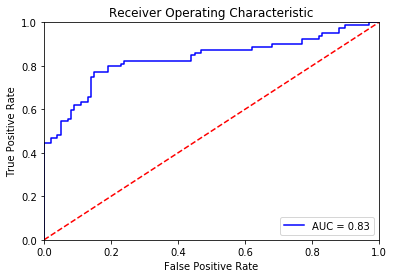

In [47]:
import sklearn.metrics as metrics
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [48]:
idx = np.min(np.where(tpr > 0.10)) 
print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

Using a threshold of 0.733 guarantees a sensitivity of 0.443 and a specificity of 1.000, i.e. a false positive rate of 0.00%.


## KNN

In [49]:
# KNN Model 1 
# Using Age imputation with median

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5) 
knn.fit(X_train1, y_train)
y_pred = knn.predict(X_test1)
acc_knn = round(knn.score(X_train1, y_train) * 100, 2)
acc_knn

80.76

In [50]:
# KNN Model 2
# Using Age imputation with End of Tail

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5) 
knn.fit(X_train2, y_train)
y_pred = knn.predict(X_test2)
acc_knn = round(knn.score(X_train2, y_train) * 100, 2)
acc_knn

80.06

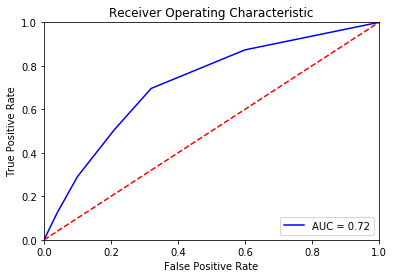

In [56]:
y_pred_proba = knn.predict_proba(X_test2)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## NAIVE BAYES

In [52]:
# NAIVE BAYES Model 1
# Using Age imputation with median


from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train1, y_train)
Y_pred = gaussian.predict(X_test1)
acc_gaussian = round(gaussian.score(X_train1, y_train) * 100, 2)
acc_gaussian

75.98

In [53]:
# NAIVE BAYES Model 2
# Using Age imputation with End of Tail


from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train2, y_train)
Y_pred = gaussian.predict(X_test2)
acc_gaussian = round(gaussian.score(X_train2, y_train) * 100, 2)
acc_gaussian

76.26

In [54]:
thr

array([1.96311394, 0.96311394, 0.73337997, 0.72973061, 0.72276668,
       0.7182753 , 0.71359051, 0.64890537, 0.53208397, 0.52195695,
       0.52131297, 0.52061393, 0.51404463, 0.50940847, 0.50385342,
       0.49211344, 0.4904336 , 0.4854529 , 0.45226124, 0.44990213,
       0.33892255, 0.33737759, 0.31925335, 0.31161277, 0.29248523,
       0.25459134, 0.25031492, 0.24913365, 0.23660297, 0.14403   ,
       0.13732077, 0.1314162 , 0.12890771, 0.1265479 , 0.08755352,
       0.08749691, 0.08233338, 0.08232633, 0.08002646, 0.07982282,
       0.07529144, 0.07382974, 0.07122777, 0.07060323, 0.06778436,
       0.06705386, 0.05952309, 0.05373561, 0.0494603 , 0.04941307,
       0.0494077 , 0.04939447, 0.0493841 , 0.04526386])

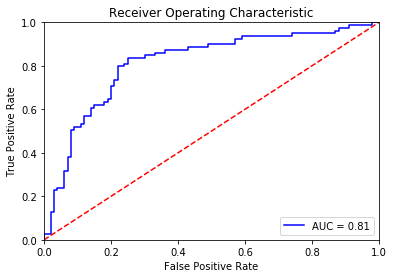

In [57]:
y_pred_proba = gaussian.predict_proba(X_test2)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()